# Imports

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import random

In [ ]:
img = cv2.imread('/content/images1.jpeg',0)

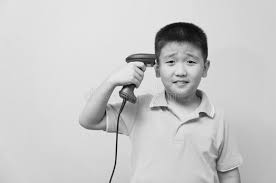

In [ ]:
cv2_imshow(img)

# Average Filtering

In [ ]:
# creating gaussian noise
noise = np.random.normal(0, 50, size = img.shape)
noisy_img = noise+img

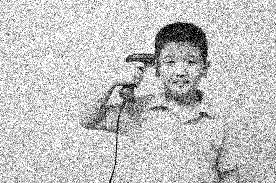

In [ ]:
cv2_imshow(noisy_img)

In [ ]:
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

In [ ]:
m,n = img.shape
filtered_img = np.zeros(img.shape)

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = noisy_img[i-1, j-1]*mask[0, 0]+noisy_img[i-1, j]*mask[0, 1]+noisy_img[i-1, j + 1]*mask[0, 2]+noisy_img[i, j-1]*mask[1, 0]+ noisy_img[i, j]*mask[1, 1]+noisy_img[i, j + 1]*mask[1, 2]+noisy_img[i + 1, j-1]*mask[2, 0]+noisy_img[i + 1, j]*mask[2, 1]+noisy_img[i + 1, j + 1]*mask[2, 2]
        filtered_img[i, j]= temp

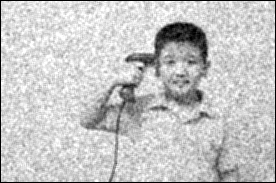

In [ ]:
cv2_imshow(filtered_img)

# Median filtering

In [ ]:
saltpepper=img.copy()
pixel = 1000
for i in range(pixel):
    y=random.randint(0, m-1)
    x=random.randint(0, n-1)
    saltpepper[y][x] = 255
pixel = 1000
for i in range(pixel):
    y=random.randint(0, m-1)
    x=random.randint(0, n-1)
    saltpepper[y][x] = 0

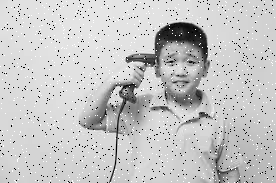

In [ ]:
cv2_imshow(saltpepper)

In [ ]:
sp_removed = np.zeros([m, n])
  
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [saltpepper[i-1, j-1],
               saltpepper[i-1, j],
               saltpepper[i-1, j + 1],
               saltpepper[i, j-1],
               saltpepper[i, j],
               saltpepper[i, j + 1],
               saltpepper[i + 1, j-1],
               saltpepper[i + 1, j],
               saltpepper[i + 1, j + 1]]
          
        temp = sorted(temp)
        sp_removed[i, j]= temp[4]


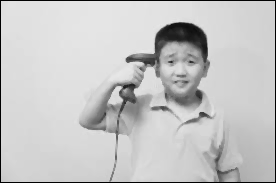

In [ ]:
cv2_imshow(sp_removed)